<a href="https://colab.research.google.com/github/Tyoosp/MachineLearning/blob/main/1stWeekTask/BookRecomendationCollaborativeFiltering/Book_Recomendation_Using_Item_Based_Collaborative_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
df = pd.read_csv('/content/books_of_the_decade.csv')
df.head()

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509


In [156]:
df.shape

(2329, 6)

In [157]:
df = df.drop('Index', axis=1)
df.head()

,Book Name,Author,Rating,Number of Votes,Score
0,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509


In [158]:
Votes = df['Number of Votes']
Votes

,Number of Votes
0,"1,184,531"
1,"718,243"
2,"657,869"
3,"1,967,348"
4,"1,151,831"
...,...
2324,"3,764"
2325,"73,552"
2326,430
2327,"12,851"


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Book Name        2329 non-null   object
 1   Author           2329 non-null   object
 2   Rating           2329 non-null   object
 3   Number of Votes  2329 non-null   object
 4   Score            2329 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.1+ KB


In [160]:
df.describe()

,Score
count,2329.000000
mean,597.599399
std,2947.850623
min,2.000000
25%,79.000000
50%,97.000000
75%,195.000000
max,62443.000000


In [161]:
df.isnull().sum()

,0
Book Name,0
Author,0
Rating,0
Number of Votes,0
Score,0


In [162]:
df.duplicated().sum()

0

its no missing value and duplicated data, but if we check at rating we found a oddity with this variabel, so we must clean a data before continue

In [163]:
df['Rating'].unique()

array(['4.18', '4.40', '4.51', '3.99', '4.46', '4.57', '3.96', '4.23',
       '4.29', '4.47', '4.15', '4.10', '4.14', 'really liked it\n4.00',
       '4.13', '4.17', '4.03', '4.30', '4.38', '4.26', '4.37', '4.56',
       '3.67', '4.21', '3.88', '3.81', '4.07', '4.20', '4.19', '3.74',
       '4.53', '3.86', '4.50', '4.16', '4.35', '3.91', '4.60', '4.33',
       '4.62', '3.69', '3.76', '4.11', '3.83', '4.31', '4.45', '4.36',
       '4.27', '4.01', '4.05', '3.82', '4.24', '4.04', '4.43', '4.39',
       '3.98', '4.34', '4.08', '4.02', '3.95', '3.80', '4.63', '3.70',
       '4.32', '3.66', '3.94', '4.54', '3.53', '3.58', '4.06', '3.75',
       '3.90', '3.73', '3.62', '4.49', '4.12', '3.64', '3.71', '4.41',
       '3.61', '3.92', '3.93', '4.25', '3.97', '3.63', '4.09', '4.55',
       '3.40', '3.85', '3.52', '4.44', '3.68', '3.55', '4.71', '4.48',
       '3.59', '3.77', '3.78', '3.42', '3.49', '3.79', '3.84', '3.47',
       '3.87', '4.28', '3.65', '3.72', '3.89', '3.28', '4.64', '4.00',
     

In [164]:
Votes.unique()

array(['1,184,531', '718,243', '657,869', ..., '73,552', '430', '12,851'],
      dtype=object)

we start to change the type off data, as before we have checked variabel 'Rating' has a object data type and now we have to change to numeric data type


In [165]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book Name        2329 non-null   object 
 1   Author           2329 non-null   object 
 2   Rating           2305 non-null   float64
 3   Number of Votes  2329 non-null   object 
 4   Score            2329 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 91.1+ KB


In [167]:
df['Rating'].unique()

array([4.18, 4.4 , 4.51, 3.99, 4.46, 4.57, 3.96, 4.23, 4.29, 4.47, 4.15,
       4.1 , 4.14,  nan, 4.13, 4.17, 4.03, 4.3 , 4.38, 4.26, 4.37, 4.56,
       3.67, 4.21, 3.88, 3.81, 4.07, 4.2 , 4.19, 3.74, 4.53, 3.86, 4.5 ,
       4.16, 4.35, 3.91, 4.6 , 4.33, 4.62, 3.69, 3.76, 4.11, 3.83, 4.31,
       4.45, 4.36, 4.27, 4.01, 4.05, 3.82, 4.24, 4.04, 4.43, 4.39, 3.98,
       4.34, 4.08, 4.02, 3.95, 3.8 , 4.63, 3.7 , 4.32, 3.66, 3.94, 4.54,
       3.53, 3.58, 4.06, 3.75, 3.9 , 3.73, 3.62, 4.49, 4.12, 3.64, 3.71,
       4.41, 3.61, 3.92, 3.93, 4.25, 3.97, 3.63, 4.09, 4.55, 3.4 , 3.85,
       3.52, 4.44, 3.68, 3.55, 4.71, 4.48, 3.59, 3.77, 3.78, 3.42, 3.49,
       3.79, 3.84, 3.47, 3.87, 4.28, 3.65, 3.72, 3.89, 3.28, 4.64, 4.  ,
       3.3 , 3.57, 4.93, 5.  , 4.58, 3.11, 4.75, 4.52, 4.22, 2.94, 3.54,
       4.66, 3.56, 3.5 , 4.7 , 2.66, 4.82, 3.29, 3.31, 3.15, 3.2 , 3.36,
       4.67, 3.32, 3.24, 3.16, 3.33, 4.61, 3.6 , 2.83, 4.79, 3.37, 3.51,
       4.91, 3.46, 4.88, 3.34, 3.39, 3.01, 3.22, 4.

In [168]:
df.isnull().sum()

,0
Book Name,0
Author,0
Rating,24
Number of Votes,0
Score,0


after we change the data type we have new problem, now at the rating variabel have 24 missing value, lets we fill with mean of data.

In [169]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [170]:
df.isnull().sum()

,0
Book Name,0
Author,0
Rating,0
Number of Votes,0
Score,0


dont forget number of vote type data is same as rating before we convert, so we have to convet to numeric

In [171]:
df['Number of Votes'] = df['Number of Votes'].str.replace(',','')

In [172]:
df['Number of Votes'] =pd.to_numeric (df['Number of Votes'], errors='coerce')

In [173]:
df.isnull().sum()

,0
Book Name,0
Author,0
Rating,0
Number of Votes,6
Score,0


In [174]:
df['Number of Votes'].unique()

array([1.184531e+06, 7.182430e+05, 6.578690e+05, ..., 7.355200e+04,
       4.300000e+02, 1.285100e+04])

In [175]:
df['Number of Votes'] = df['Number of Votes'].fillna(df['Number of Votes'].mean())

In [176]:
df.isnull().sum()

,0
Book Name,0
Author,0
Rating,0
Number of Votes,0
Score,0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Book Name        2329 non-null   object 
 1   Author           2329 non-null   object 
 2   Rating           2329 non-null   float64
 3   Number of Votes  2329 non-null   float64
 4   Score            2329 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 91.1+ KB


In [178]:
df.head()

,Book Name,Author,Rating,Number of Votes,Score
0,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,1184531.0,62443
1,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,718243.0,47323
2,Project Hail Mary,Andy Weir,4.51,657869.0,45972
3,The Midnight Library,Matt Haig,3.99,1967348.0,42746
4,I'm Glad My Mom Died,Jennette McCurdy,4.46,1151831.0,37509


In [179]:
df.describe()

,Rating,Number of Votes,Score
count,2329.000000,2.329000e+03,2329.000000
mean,4.035124,6.207556e+04,597.599399
std,0.314647,1.637427e+05,2947.850623
min,2.660000,2.000000e+00,2.000000
25%,3.820000,2.738000e+03,79.000000
50%,4.060000,1.225500e+04,97.000000
75%,4.260000,5.083300e+04,195.000000
max,5.000000,2.071618e+06,62443.000000


after all of convert data type, now we will check and clean the  outlier

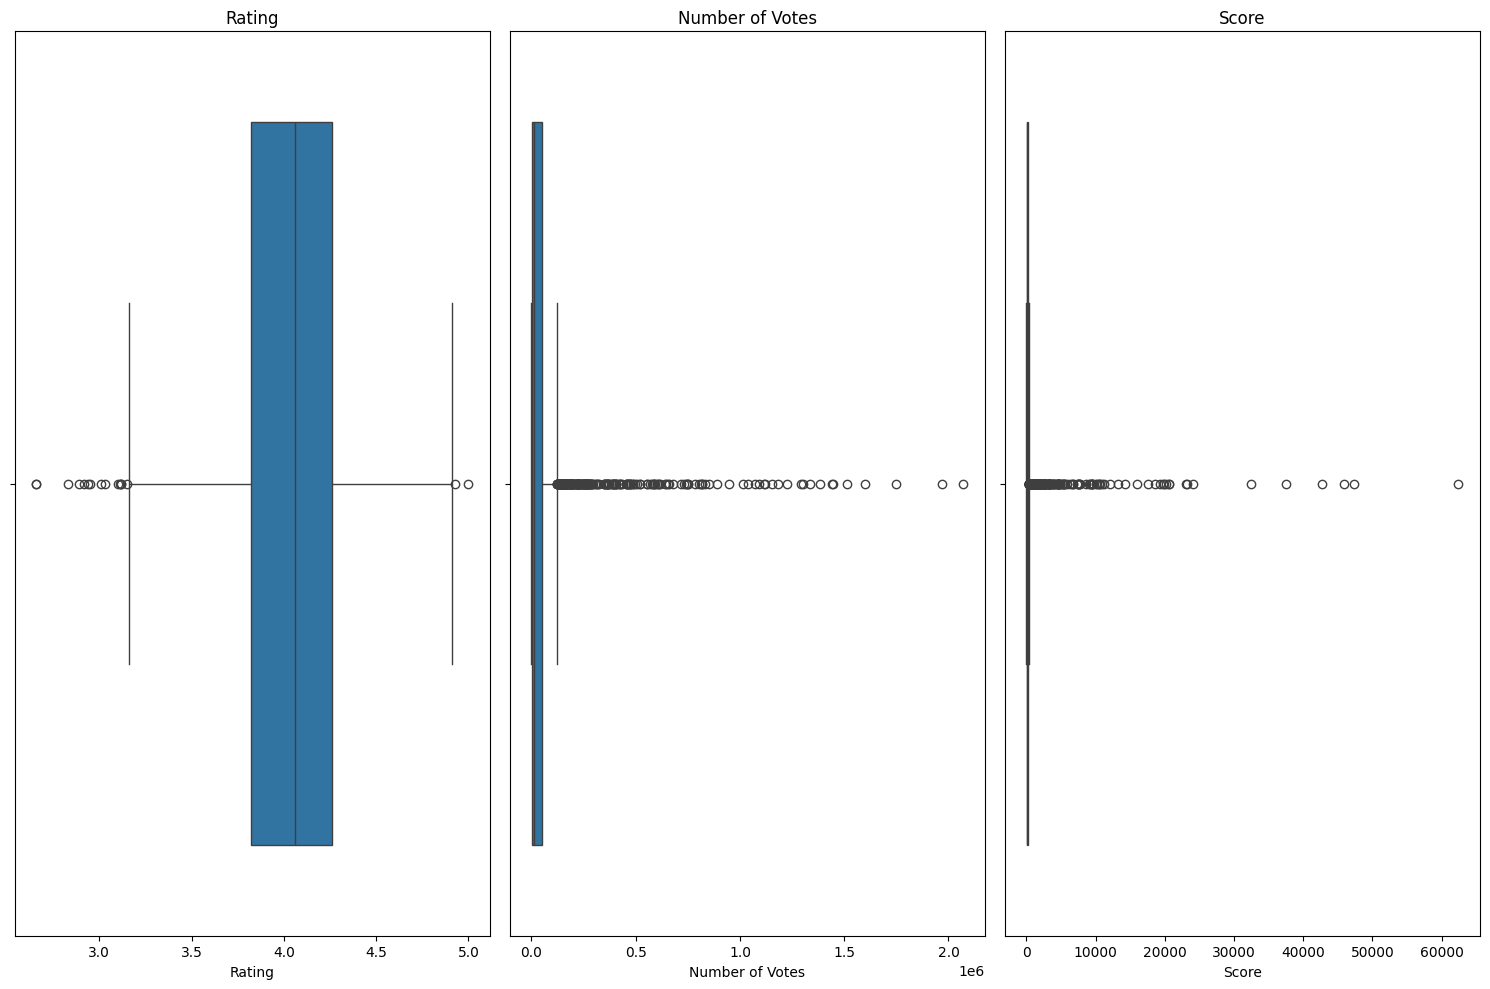

In [180]:
numerical_features = df.select_dtypes(include=np.number)

num_cols = numerical_features.shape[1]
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
  plt.subplot(num_rows, 3, i+1)  # Use calculated num_rows
  sns.boxplot(x=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

In [181]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]

Q1 = df['Number of Votes'].quantile(0.25)
Q3 = df['Number of Votes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Number of Votes'] < lower_bound) | (df['Number of Votes'] > upper_bound)]

Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Score'] < lower_bound) | (df['Score'] > upper_bound)]

print("Outliers in Rating:")
print(outliers['Rating'])

print("Outliers in Number of Votes:")
print(outliers['Number of Votes'])

print("Outliers in Score:")
print(outliers['Score'])

Outliers in Rating:
0      4.18
1      4.40
2      4.51
3      3.99
4      4.46
       ... 
350    4.11
351    4.16
352    3.71
353    3.90
354    4.28
Name: Rating, Length: 355, dtype: float64
Outliers in Number of Votes:
0      1184531.0
1       718243.0
2       657869.0
3      1967348.0
4      1151831.0
         ...    
350      10492.0
351     166463.0
352      12746.0
353      45985.0
354     109979.0
Name: Number of Votes, Length: 355, dtype: float64
Outliers in Score:
0      62443
1      47323
2      45972
3      42746
4      37509
       ...  
350      375
351      374
352      372
353      372
354      371
Name: Score, Length: 355, dtype: int64


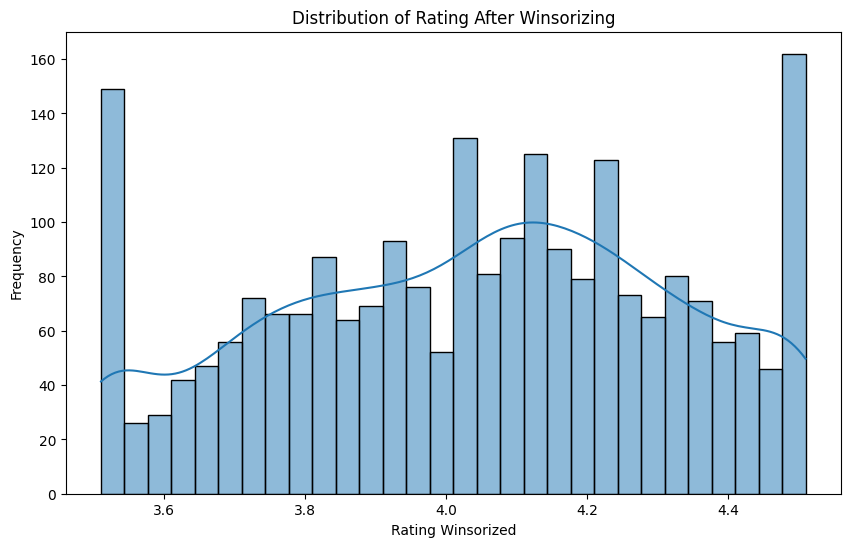

In [182]:
from scipy.stats.mstats import winsorize

lower_limit = 0.05
upper_limit = 0.05

df['Rating'] = winsorize(df['Rating'], limits=(lower_limit, upper_limit), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title('Distribution of Rating After Winsorizing')
plt.xlabel('Rating Winsorized')
plt.ylabel('Frequency')
plt.show()



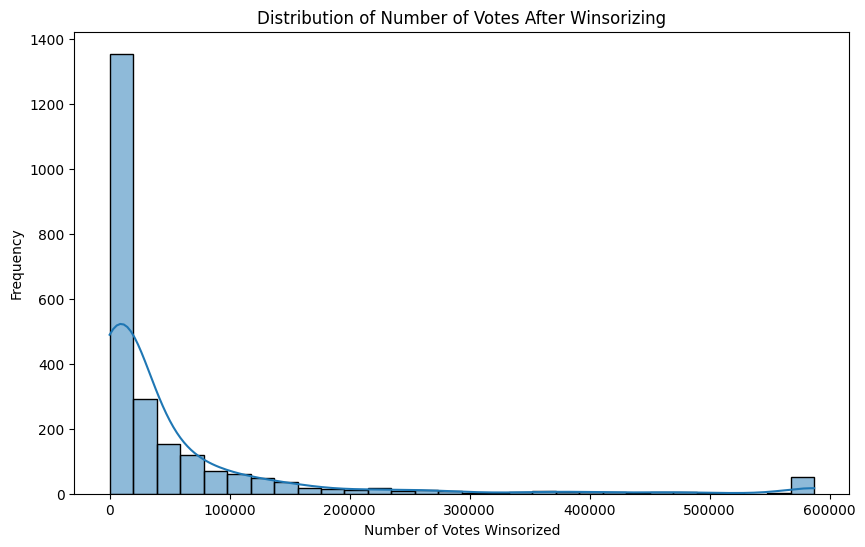

In [183]:
lower_limit = 0.02
upper_limit = 0.02

df['Number of Votes'] = winsorize(df['Number of Votes'], limits=(lower_limit, upper_limit), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Votes'], kde=True, bins=30)
plt.title('Distribution of Number of Votes After Winsorizing')
plt.xlabel('Number of Votes Winsorized')
plt.ylabel('Frequency')
plt.show()



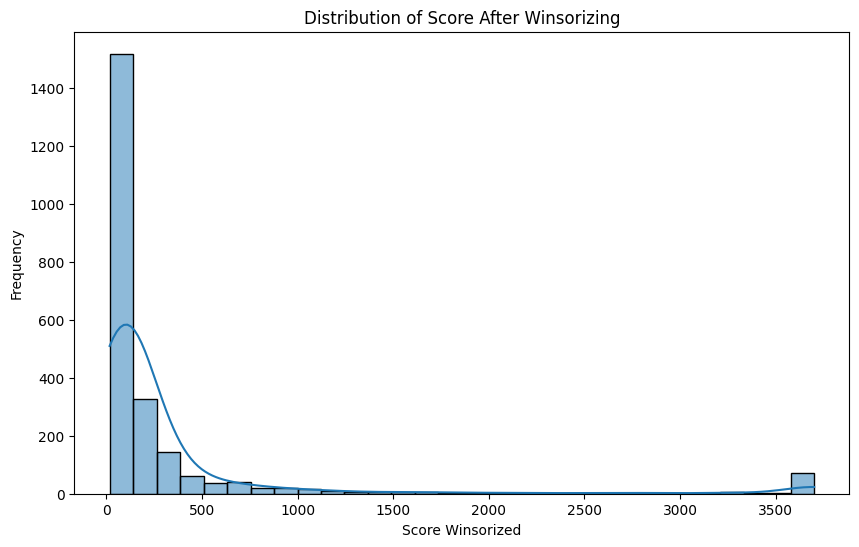

In [184]:
lower_limit = 0.02
upper_limit = 0.03

df['Score'] = winsorize(df['Score'], limits=(lower_limit, upper_limit), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, bins=30)
plt.title('Distribution of Score After Winsorizing')
plt.xlabel('Score Winsorized')
plt.ylabel('Frequency')
plt.show()

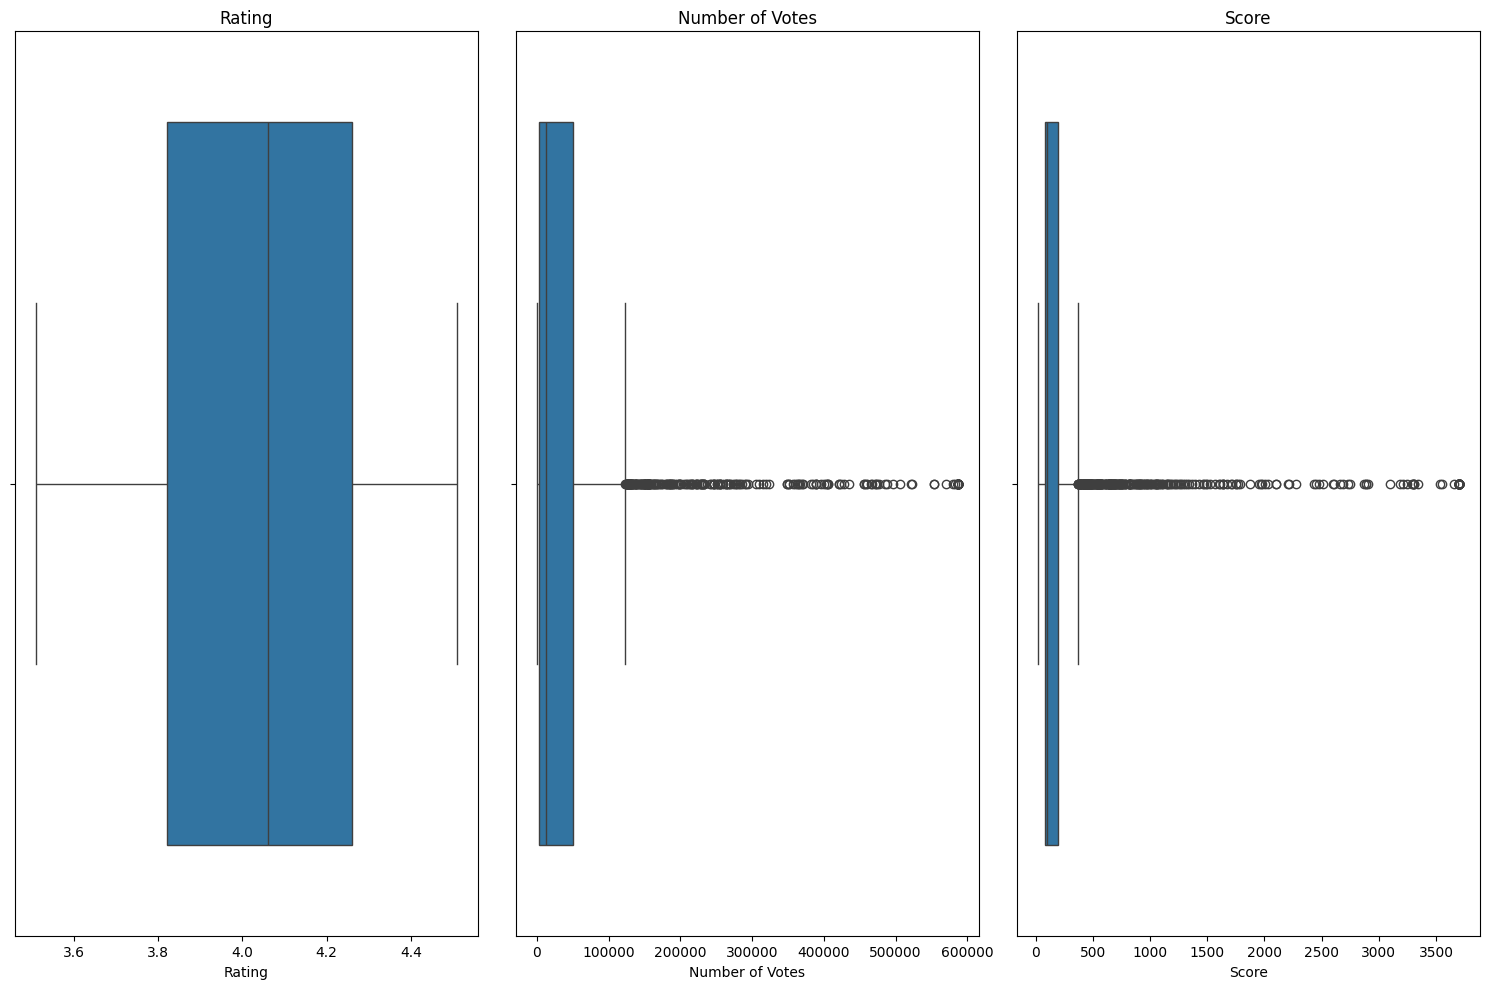

In [185]:
numerical_features = df.select_dtypes(include=np.number)

num_cols = numerical_features.shape[1]
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
  plt.subplot(num_rows, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

and Finally we found a good way to fix the outlier

In [186]:
Q1 = df['Number of Votes'].quantile(0.25)
Q3 = df['Number of Votes'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['Number of Votes'] = np.where(df['Number of Votes'] < batas_bawah, batas_bawah,
                           np.where(df['Number of Votes'] > batas_atas, batas_atas, df['Number of Votes']))

df['Number of Votes'] = np.log(df['Number of Votes'])

In [187]:
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

df['Score'] = np.where(df['Score'] < batas_bawah, batas_bawah,
                           np.where(df['Score'] > batas_atas, batas_atas, df['Score']))

df['Score'] = np.log(df['Score'])

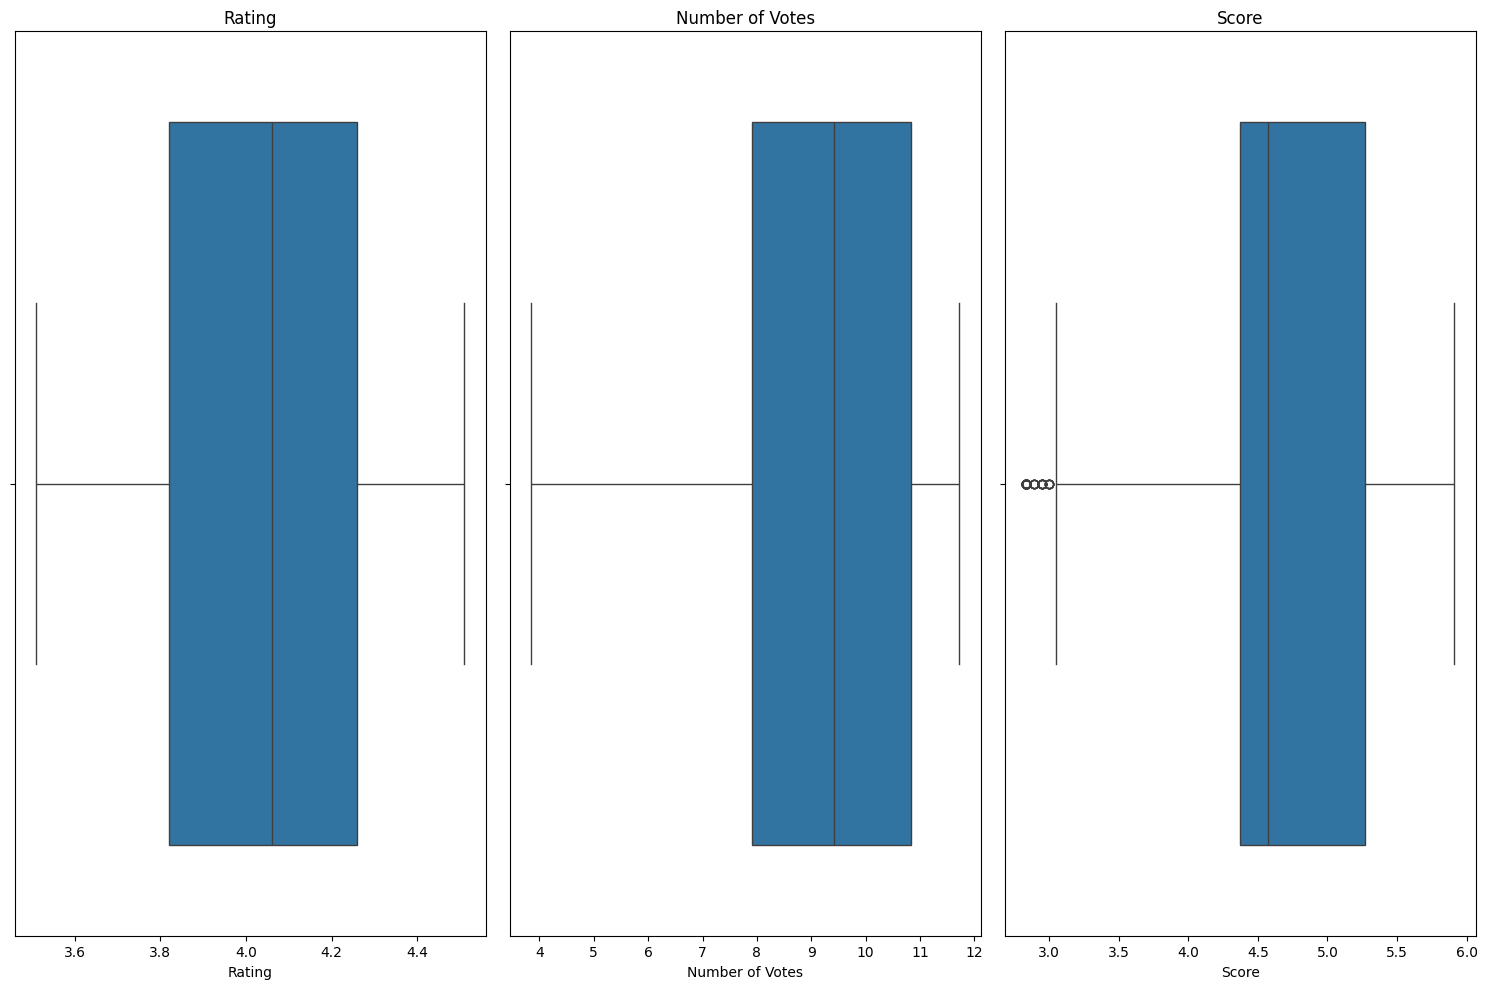

In [188]:
numerical_features = df.select_dtypes(include=np.number)

num_cols = numerical_features.shape[1]
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
  plt.subplot(num_rows, 3, i+1)
  sns.boxplot(x=df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

After we fix all of missing data,duplicated data, and outlier now we can visualization data

In [189]:
df.head(10)

,Book Name,Author,Rating,Number of Votes,Score
0,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,11.71974,5.910797
1,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,11.71974,5.910797
2,Project Hail Mary,Andy Weir,4.51,11.71974,5.910797
3,The Midnight Library,Matt Haig,3.99,11.71974,5.910797
4,I'm Glad My Mom Died,Jennette McCurdy,4.46,11.71974,5.910797
5,"Fourth Wing (The Empyrean, #1)",Rebecca Yarros,4.51,11.71974,5.910797
6,The Ballad of Songbirds and Snakes (The Hunger...,Suzanne Collins,3.96,11.71974,5.910797
7,Piranesi,Susanna Clarke,4.23,11.71974,5.910797
8,Lessons in Chemistry,Bonnie Garmus,4.29,11.71974,5.910797
9,"House of Earth and Blood (Crescent City, #1)",Sarah J. Maas,4.47,11.71974,5.910797


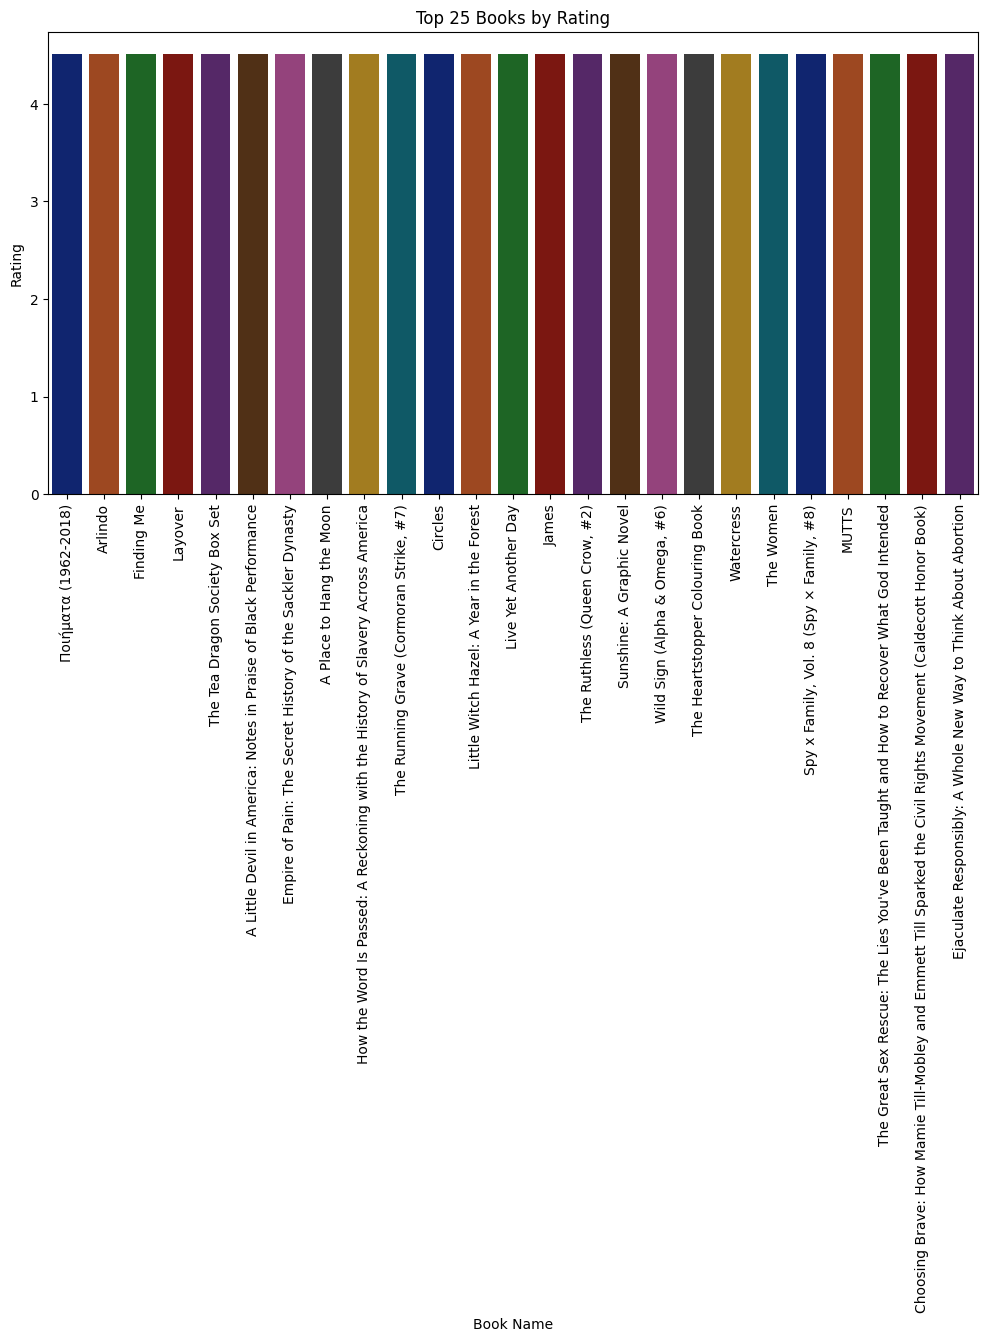

In [190]:

top_25_books = df.sort_values('Rating', ascending=False).head(25)[['Book Name', 'Rating']]

plt.figure(figsize=(12,6))
sns.barplot(x='Book Name', y='Rating', data=top_25_books, palette='dark')
plt.title('Top 25 Books by Rating')
plt.xticks(rotation=90)
plt.xlabel('Book Name')
plt.ylabel('Rating')
plt.show()

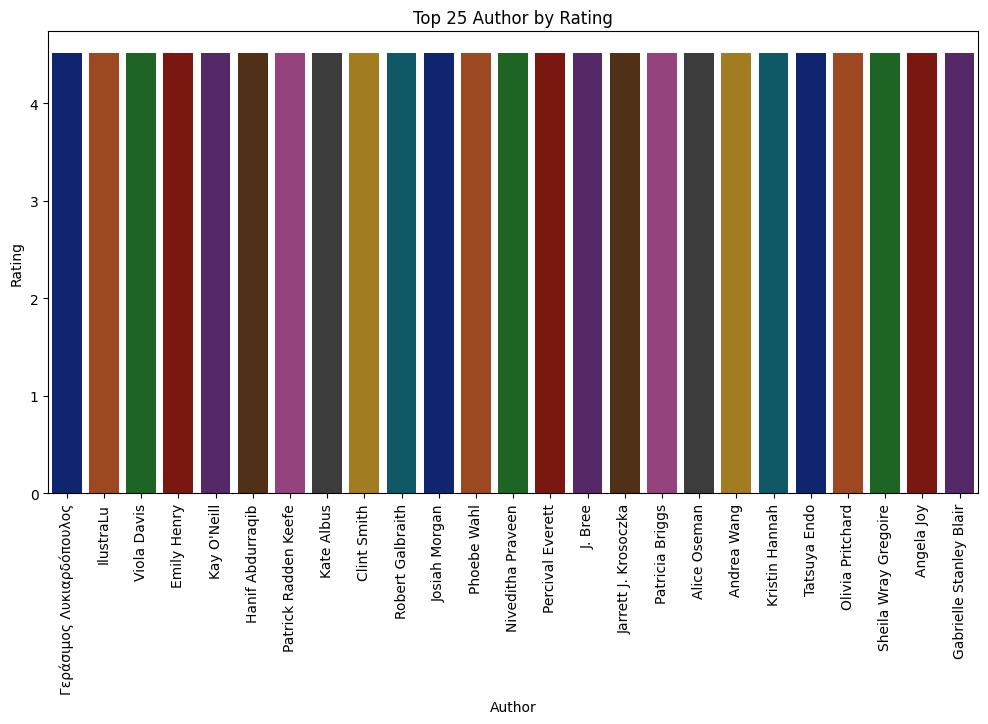

In [191]:
top_25_Author = df.sort_values('Rating', ascending=False).head(25)[['Author', 'Rating']]

plt.figure(figsize=(12,6))
sns.barplot(x='Author', y='Rating', data=top_25_Author, palette='dark')
plt.title('Top 25 Author by Rating')
plt.xticks(rotation=90)
plt.xlabel('Author')
plt.ylabel('Rating')
plt.show()

In [192]:

author_name = 'Alice Oseman'
books_by_author = df[df['Author'] == author_name]['Book Name'].tolist()

if books_by_author:
  print(f"Books by {author_name}:")
  for book in books_by_author:
    print(book)
else:
  print(f"No books found by {author_name} in the dataset.")

Books by Alice Oseman:
Heartstopper: Volume Three (Heartstopper, #3)
Loveless
Heartstopper: Volume Four (Heartstopper, #4)
Heartstopper: Volume Five (Heartstopper, #5)
The Heartstopper Yearbook
The Heartstopper Colouring Book


After all clear so we start to build a model using Item-based-collaborative-filtering

In [193]:

ratings_matrix = df.pivot_table(index='Book Name', columns='Author', values='Rating')

ratings_matrix = ratings_matrix.fillna(0)

from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(ratings_matrix)

item_similarity_df = pd.DataFrame(item_similarity, index=ratings_matrix.index, columns=ratings_matrix.index)


def get_recommendations(book_name, similarity_matrix, top_n=5):
    """
    Recommends similar books based on item-based collaborative filtering.

    Args:
        book_name: The name of the book to find similar books for.
        similarity_matrix: The matrix of similarity scores between books.
        top_n: The number of recommendations to return.

    Returns:
        A list of recommended book names.
    """
    if book_name not in similarity_matrix.index:
        return "Book not found in dataset."

    similar_scores = similarity_matrix[book_name]
    similar_books = similar_scores.sort_values(ascending=False)
    recommended_books = similar_books[1:top_n+1].index.tolist()
    return recommended_books


In [195]:

book_input = "The Heartstopper Colouring Book"


recommendations = get_recommendations(book_input, item_similarity_df)


if isinstance(recommendations, str):
  print(recommendations)
else:
  print("Rekomendasi untuk buku", book_input + ":")
  for book in recommendations:
    print("- ", book)

Rekomendasi untuk buku The Heartstopper Colouring Book:
-  Heartstopper: Volume Five (Heartstopper, #5)
-  The Heartstopper Colouring Book
-  The Heartstopper Yearbook
-  Heartstopper: Volume Three (Heartstopper, #3)
-  Loveless
